# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))]) # tuples of 1
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [9]:

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    # image = image.numpy().transpose((1, 2, 0))
    image = image.numpy().transpose((1, 2, 0)) ## channel goes last, 
    # image = image.numpy()
    print("im shape before normalization", image.shape)
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        print("im shape after normalization", image.shape) # converting to 3 channel one!!!

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

Here we can see one of the images.

torch.Size([1, 28, 28])
im shape before normalization (28, 28, 1)
im shape after normalization (28, 28, 3)


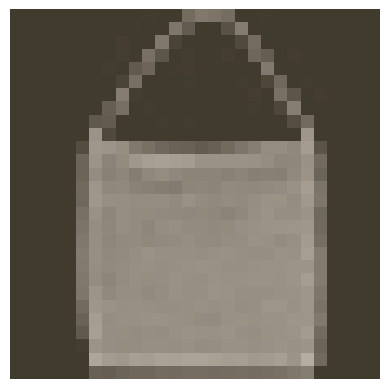

In [10]:
images, label = next(iter(trainloader))
print(images[0, :].shape)
imshow(images[0,:]);
# helper.imshow(images[0,:]);
# plt.show()
# plt.imshow(images[0].view(images[0].shape[1], -1), cmap='gray') #unnormalized?

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [13]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

In [76]:
# TODO: Define your network architecture here
inputShape = 784
h1shape = 128
h2shape = 64
oShape = 10
model = nn.Sequential(
    nn.Linear(inputShape, h1shape),
    nn.ReLU(),
    nn.Linear(h1shape, h2shape),
    nn.ReLU(),
    nn.Linear(h2shape, oShape),
    nn.LogSoftmax(dim=1) # single image
)


class MyNet(nn.Module):
    
    def __init__(self, inputShape):
        self.h1shape = 256
        self.h2shape = 128
        self.h3shape = 64
        self.oShape = 10
        super().__init__()
        self.ffn1 = nn.Linear(inputShape, self.h1shape)
        self.ffn2 = nn.Linear(self.h1shape, self.h2shape)
        self.ffn3 = nn.Linear(self.h2shape, self.h3shape)
        self.ffn4 = nn.Linear(self.h3shape, self.oShape)
    
    def forward(self, x):
        x = self.ffn1(x)
        x = F.relu(x)
        x = self.ffn2(x)
        x = F.relu(x)
        x = self.ffn3(x)
        x = F.relu(x)
        x = self.ffn4(x)
        # print(f"forward logit shape {x.shape}")
        return F.log_softmax(x, dim=1) #64x10. across rows is dim 1 not dim 0. language problem
    


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [80]:
# TODO: Create the network, define the criterion and optimizer

model2 = MyNet(inputShape)
model = model
model = model2
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [82]:
# TODO: Train the network here
epochs  = 5
for e in range(epochs):
    epochLoss = 0
    for images, labels in trainloader:
        # flatten image
        images = images.view(images.shape[0], -1)
        
        # forward
        logsofts = model(images)
        
        loss = criterion(logsofts, labels) # criterion produces average loss. 
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # update weights
        optimizer.step()
        
        epochLoss += loss.item() 
        
    
    print(f"epoch {e+1} loss {epochLoss}");

epoch 1 loss 481.06293946504593
epoch 2 loss 367.74332892149687
epoch 3 loss 334.2247793674469
epoch 4 loss 312.57878106832504
epoch 5 loss 294.07698461413383


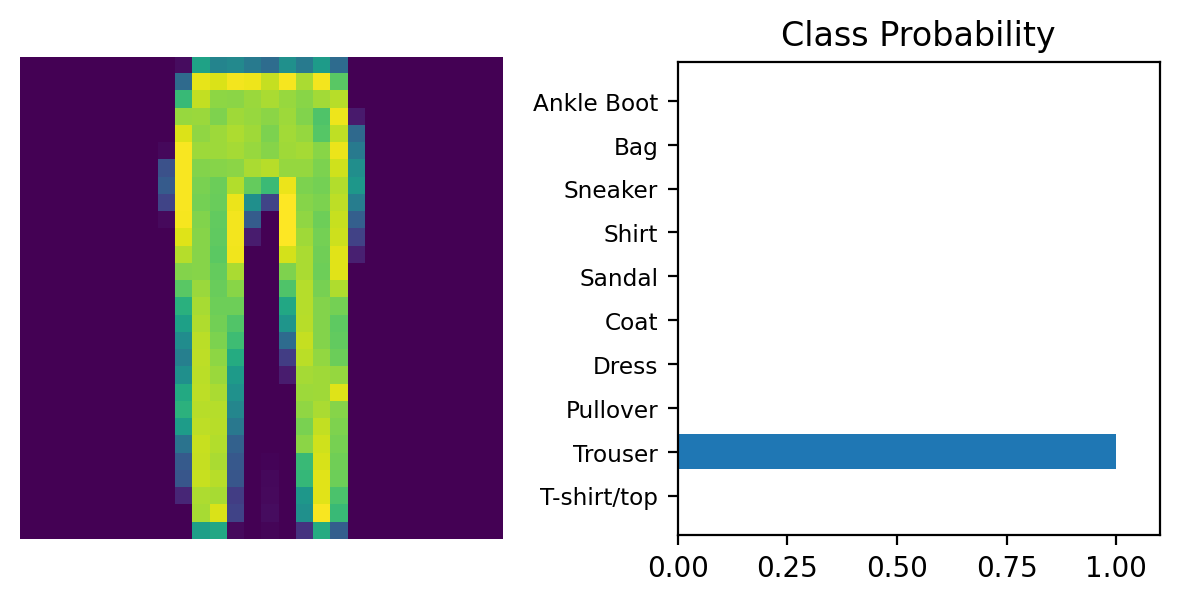

In [83]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')